In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 100

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00335 s
Reach the maximum iteration	 71.98 s
At 267 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.603162055336
Development Accuracy:	 0.417236662107
Evaluation Accuracy:	 0.393839383938


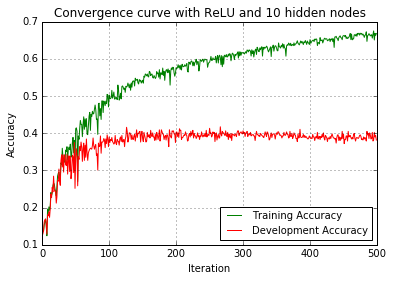

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00715 s
Reach the maximum iteration	 84.75 s
At 116 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.577865612648
Development Accuracy:	 0.436388508892
Evaluation Accuracy:	 0.442244224422


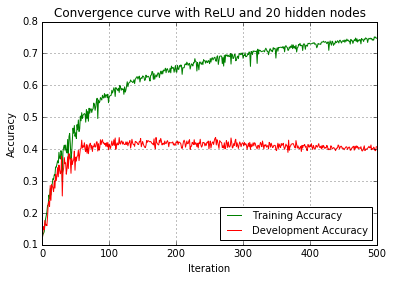

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00607 s
Reach the maximum iteration	 89.39 s
At 300 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.648616600791
Development Accuracy:	 0.441860465116
Evaluation Accuracy:	 0.401540154015


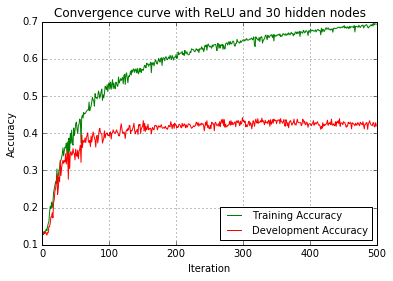

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00506 s
Reach the maximum iteration	 109.24 s
At 301 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.650395256917
Development Accuracy:	 0.411764705882
Evaluation Accuracy:	 0.34103410341


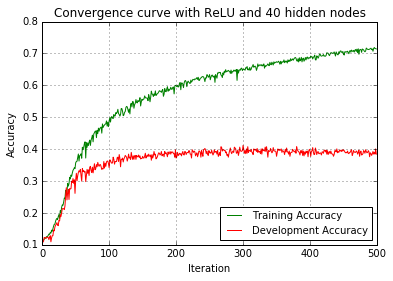

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00368 s
Reach the maximum iteration	 101.78 s
At 300 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.574901185771
Development Accuracy:	 0.393980848153
Evaluation Accuracy:	 0.36303630363


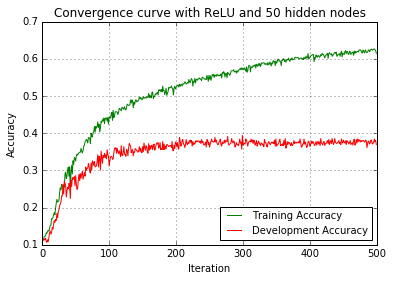

In [14]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00843 s
Reach the maximum iteration	 184.24 s
At 172 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.577075098814
Development Accuracy:	 0.463748290014
Evaluation Accuracy:	 0.402640264026


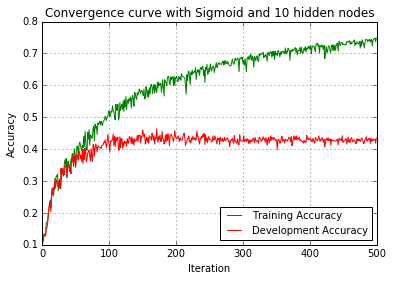

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00687 s
Reach the maximum iteration	 190.83 s
At 139 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.660276679842
Development Accuracy:	 0.480164158687
Evaluation Accuracy:	 0.410341034103


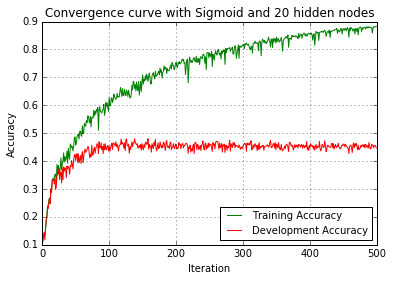

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01089 s
Reach the maximum iteration	 210.65 s
At 139 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.766205533597
Development Accuracy:	 0.469220246238
Evaluation Accuracy:	 0.442244224422


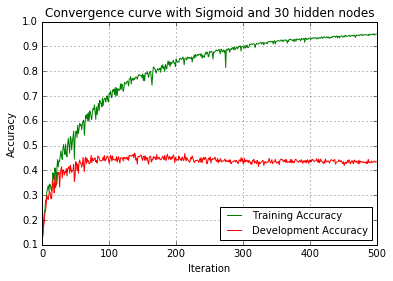

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01197 s
Reach the maximum iteration	 218.83 s
At 71 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.65
Development Accuracy:	 0.461012311902
Evaluation Accuracy:	 0.423542354235


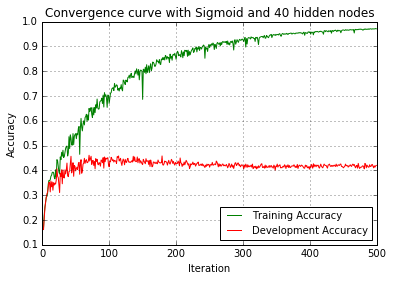

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00993 s
Reach the maximum iteration	 249.32 s
At 93 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.735968379447
Development Accuracy:	 0.470588235294
Evaluation Accuracy:	 0.447744774477


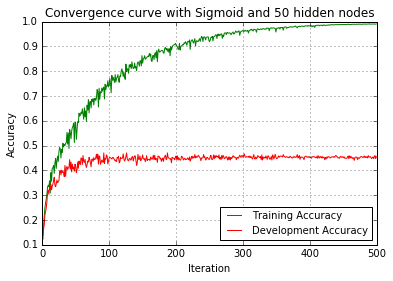

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.00982 s
Reach the maximum iteration	 312.87 s
At 237 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.593675889328
Development Accuracy:	 0.443228454172
Evaluation Accuracy:	 0.381738173817


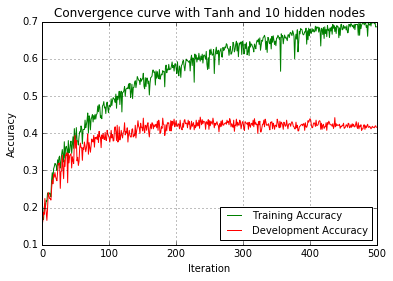

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01984 s
Reach the maximum iteration	 309.45 s
At 246 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.769367588933
Development Accuracy:	 0.478796169631
Evaluation Accuracy:	 0.446644664466


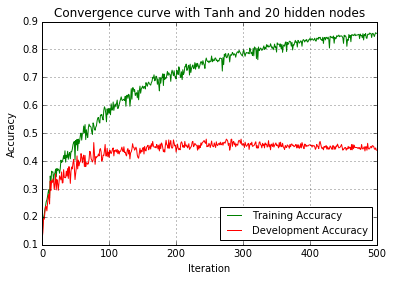

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01692 s
Reach the maximum iteration	 355.53 s
At 125 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.668181818182
Development Accuracy:	 0.484268125855
Evaluation Accuracy:	 0.444444444444


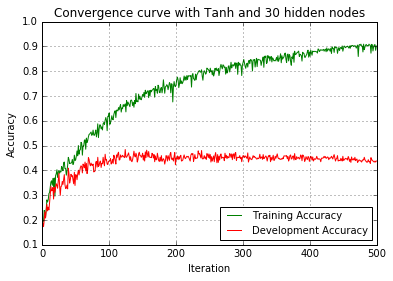

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0184 s
Reach the maximum iteration	 414.85 s
At 127 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.716600790514
Development Accuracy:	 0.492476060192
Evaluation Accuracy:	 0.435643564356


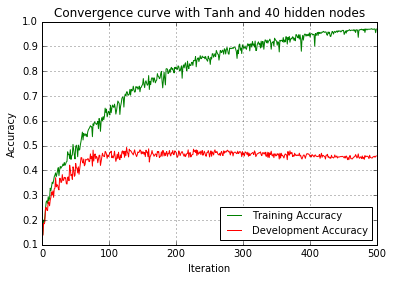

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02139 s
Reach the maximum iteration	 412.79 s
At 183 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.846640316206
Development Accuracy:	 0.474692202462
Evaluation Accuracy:	 0.424642464246


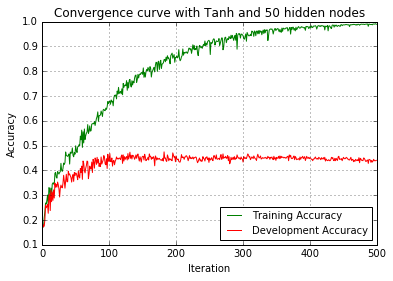

In [7]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()